# Práctico Análisis y Visualización de Datos 


**Objetivo y alcance:**

Se introducirá la miscelánea disponible para la inspección y visualización de la estadística descriptiva, estadística inferencial y probabilidad conjunta para cada una de las variables físicas de las galaxias, herramientas suficientes para determinar la distribución y estadisticos de las cantidades físicas que caracterizan al dataset y como éstas están relacionadas.

**Método:**
El objetivo será hecho a través de las librerías de python dedicadas a la examinación y visualización, principalmente con librerías como: pandas, numpy, seaborn, matplotlib y scipy. En la parte estadística se estudiarán los intercuartiles, valores extremos, *outliers* y las distribuciones que sigue cada una de las variables ajustadas a la distribución normal, las mismas tambien se visualizarán a través de histogramas y boxplots.  Usando métodos probabilisticos como el teorema de Bayes, chi-cuadrado y el intervalo de confianza de la mediana en los boxplots se verá la correlación entre estas variables.


Estructura del informe:
- Presentación de los datos;
- Visualización de datos categóricos y numéricos;
- Valores explícitos característicos de la distribución de algunas de las variables;
- Vizualización de la distribución con los valores característicos de la misma;
- Ajuste de la distribución a una Normal;
- Examinación de distribuciones de probabilidades discretas y continuas;
- Correlación entre las variables;
- Visualización de correlación entre variables usando mapas de calor;
- Conclusiones.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [13]:
data = pd.read_csv('galaxias.csv', 
                   sep=',')

In [14]:
display('Head',data.head(4))
display('Tamaño',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


'Tamaño'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [4]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(2)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S


In [5]:
data.clase.str.contains(r"\^", na=True)

0        False
1        False
2        False
3        False
4        False
         ...  
92097    False
92098    False
92099    False
92100    False
92101    False
Name: clase, Length: 92102, dtype: bool

# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [6]:
data.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


### Miramos los valores atipicos

In [7]:
data[data['Mag_u']==-9999.000000]

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
4020,209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027598,10015.86,0,0,1,I
4021,209.589671,-0.625217,-9999.0,-9999.0,16.85656,16.53999,-9999.0,6.973291,0.027604,10015.86,0,0,1,I


### Dos tipos de boxplot sin eliminacion de outliers ni valores extremos o falsos

<Axes: xlabel='color', ylabel='clase'>

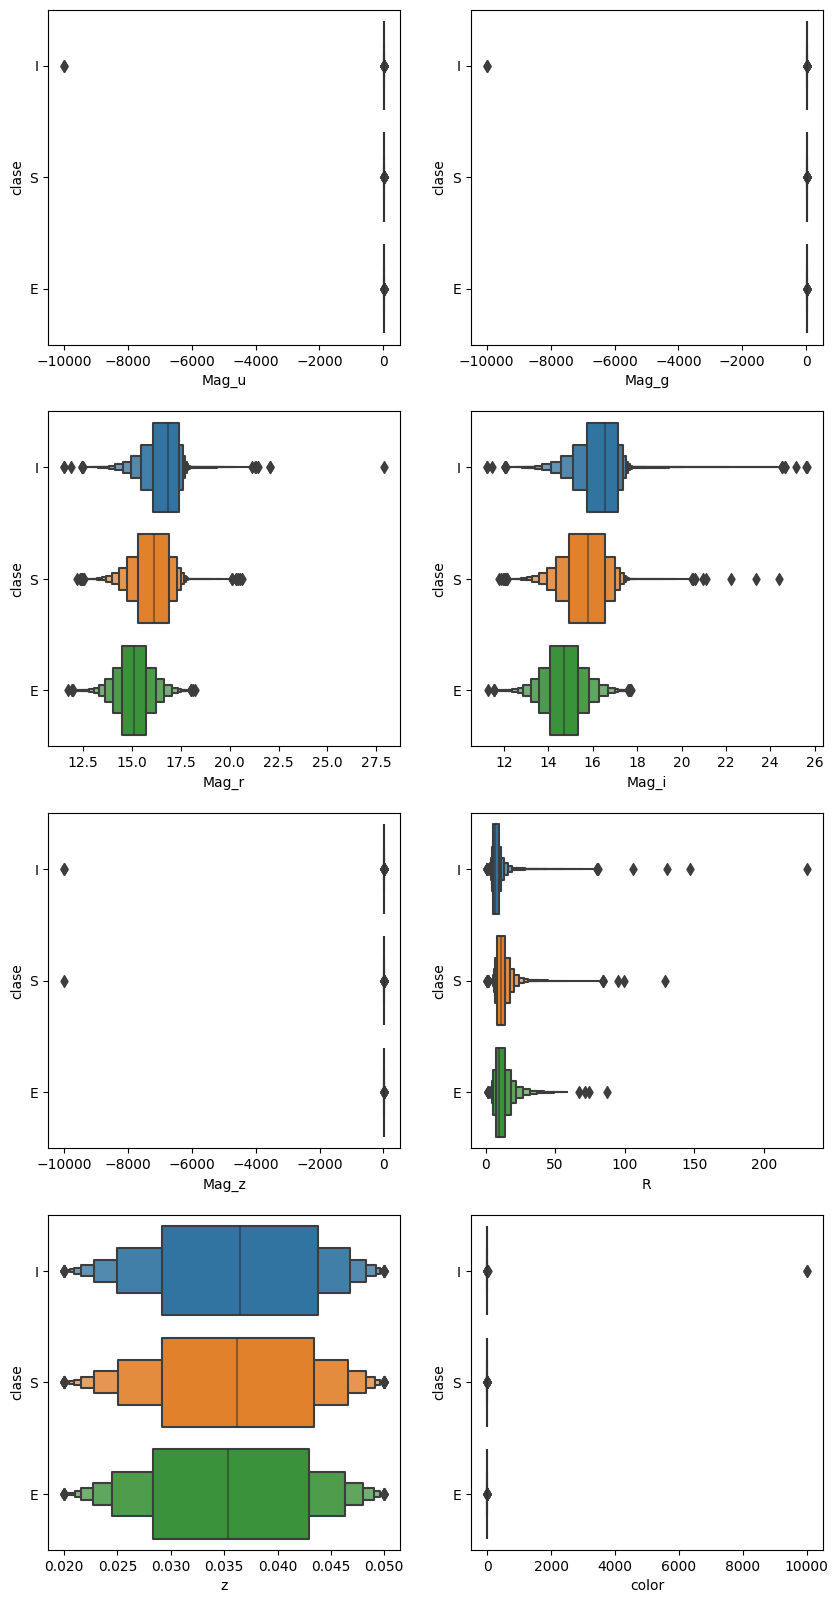

In [8]:
fig, ax = plt.subplots(4, 2,sharex=False, figsize=(10, 20))
sns.boxenplot(data=data,x='Mag_u',y='clase', ax=ax[0][0])
sns.boxenplot(data=data,x='Mag_g',y='clase', ax=ax[0][1])
sns.boxenplot(data=data,x='Mag_r',y='clase', ax=ax[1][0])
sns.boxenplot(data=data,x='Mag_i',y='clase', ax=ax[1][1])
sns.boxenplot(data=data,x='Mag_z',y='clase', ax=ax[2][0])
sns.boxenplot(data=data,x='R'    ,y='clase', ax=ax[2][1])
sns.boxenplot(data=data,x='z'    ,y='clase', ax=ax[3][0])
sns.boxenplot(data=data,x='color',y='clase', ax=ax[3][1])
#plt.savefig('boxplotconoutliers.png')

<Axes: title={'center': 'color'}, xlabel='clase'>

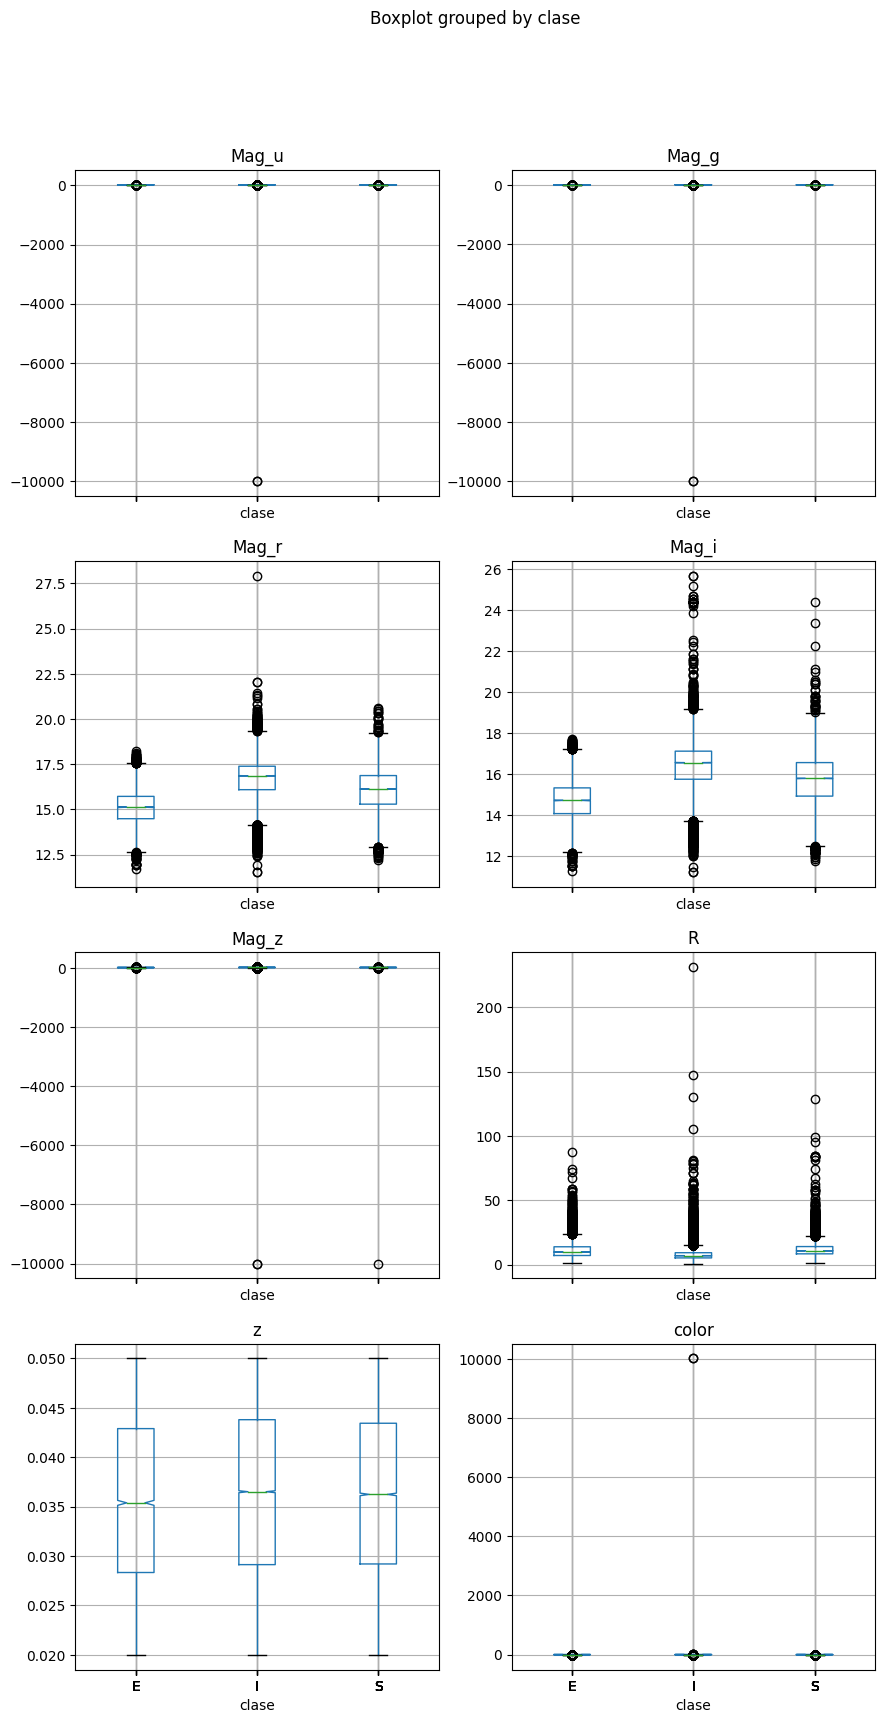

In [9]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data.boxplot('Mag_u','clase',notch=True, ax=ax[0][0])
data.boxplot('Mag_g','clase',notch=True, ax=ax[0][1])
data.boxplot('Mag_r','clase',notch=True, ax=ax[1][0])
data.boxplot('Mag_i','clase',notch=True, ax=ax[1][1])
data.boxplot('Mag_z','clase',notch=True, ax=ax[2][0])
data.boxplot('R','clase',notch=True, ax=ax[2][1])
data.boxplot('z','clase', notch=True,ax=ax[3][0])
data.boxplot('color','clase',notch=True, ax=ax[3][1])
#plt.savefig('sucio.png')

### Eliminacion de valores Falsos

In [10]:
data.replace(-9999.000000,np.NaN,inplace=True)
data.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92100.000000,92100.000000,92102.000000,92102.000000,92099.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.360906,16.925888,16.312647,15.991780,15.759628,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,0.986590,1.012591,1.092588,1.151259,1.205630,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,14.385140,12.346330,11.524090,11.220580,10.845260,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725210,16.251045,15.562648,15.197173,14.910850,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442540,17.082430,16.491180,16.171225,15.934110,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028290,17.720827,17.209298,16.928400,16.736470,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


In [11]:
data2= data[data['color']<11].copy()
data2.columns

Index(['ra', 'dec', 'Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z',
       'color', 'eliptica', 'espiral', 'irregular', 'clase'],
      dtype='object')

### Dos tipos de boxplot eliminando valores falsos pero dejando los outliers

<Axes: xlabel='color', ylabel='clase'>

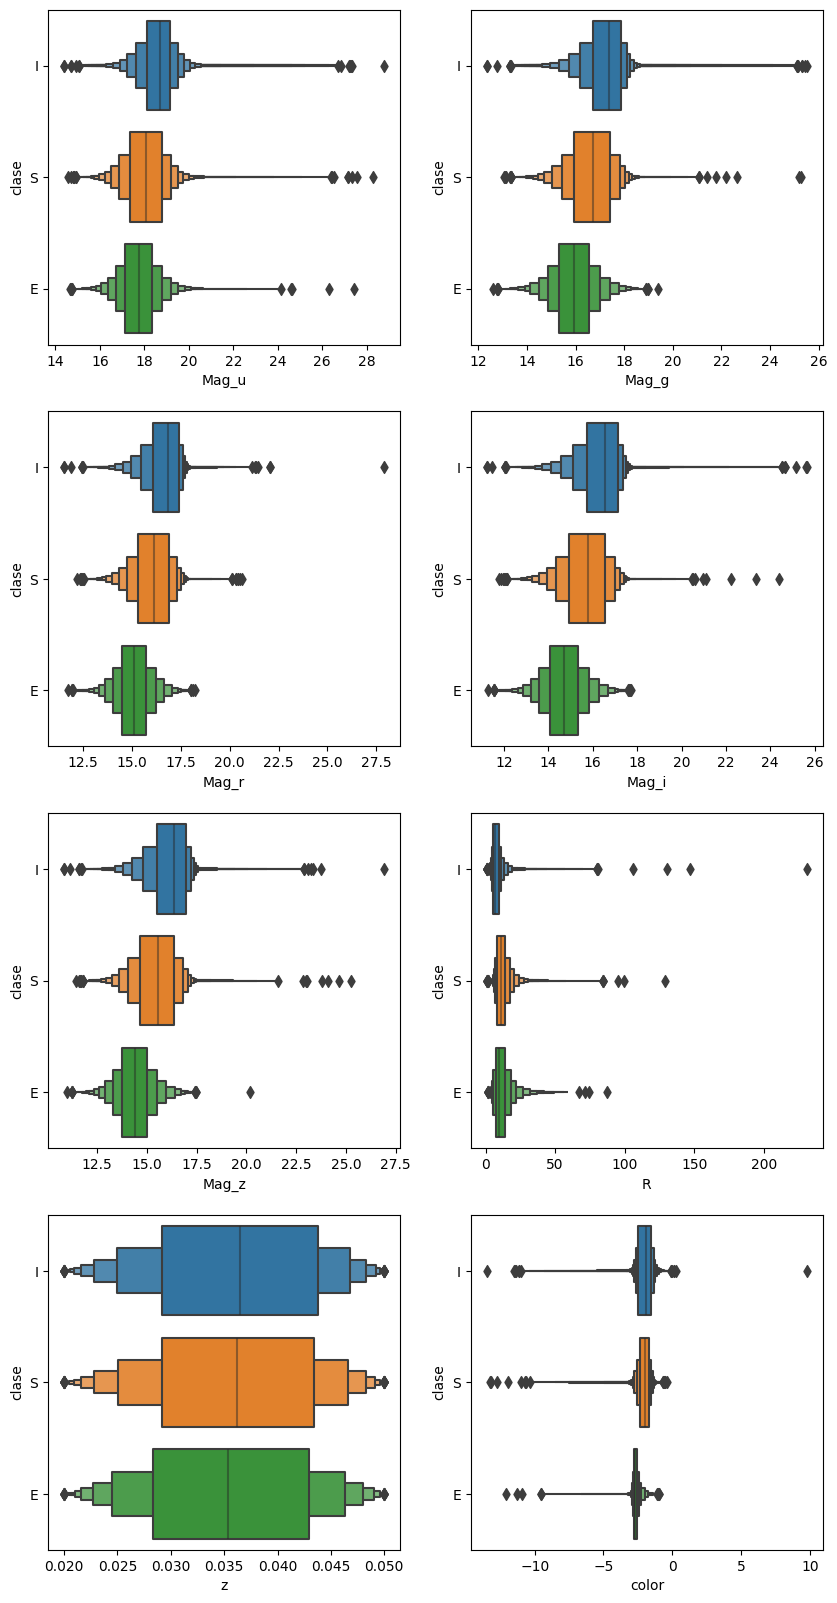

In [12]:
fig, ax = plt.subplots(4, 2,sharex=False, figsize=(10, 20))
sns.boxenplot(data=data2,x='Mag_u',y='clase', ax=ax[0][0])
sns.boxenplot(data=data2,x='Mag_g',y='clase', ax=ax[0][1])
sns.boxenplot(data=data2,x='Mag_r',y='clase', ax=ax[1][0])
sns.boxenplot(data=data2,x='Mag_i',y='clase', ax=ax[1][1])
sns.boxenplot(data=data2,x='Mag_z',y='clase', ax=ax[2][0])
sns.boxenplot(data=data2,x='R'    ,y='clase', ax=ax[2][1])
sns.boxenplot(data=data2,x='z'    ,y='clase', ax=ax[3][0])
sns.boxenplot(data=data2,x='color',y='clase', ax=ax[3][1])
#plt.savefig('boxplotconoutlierssinvaloresfalsos.png')

<Axes: title={'center': 'color'}, xlabel='clase'>

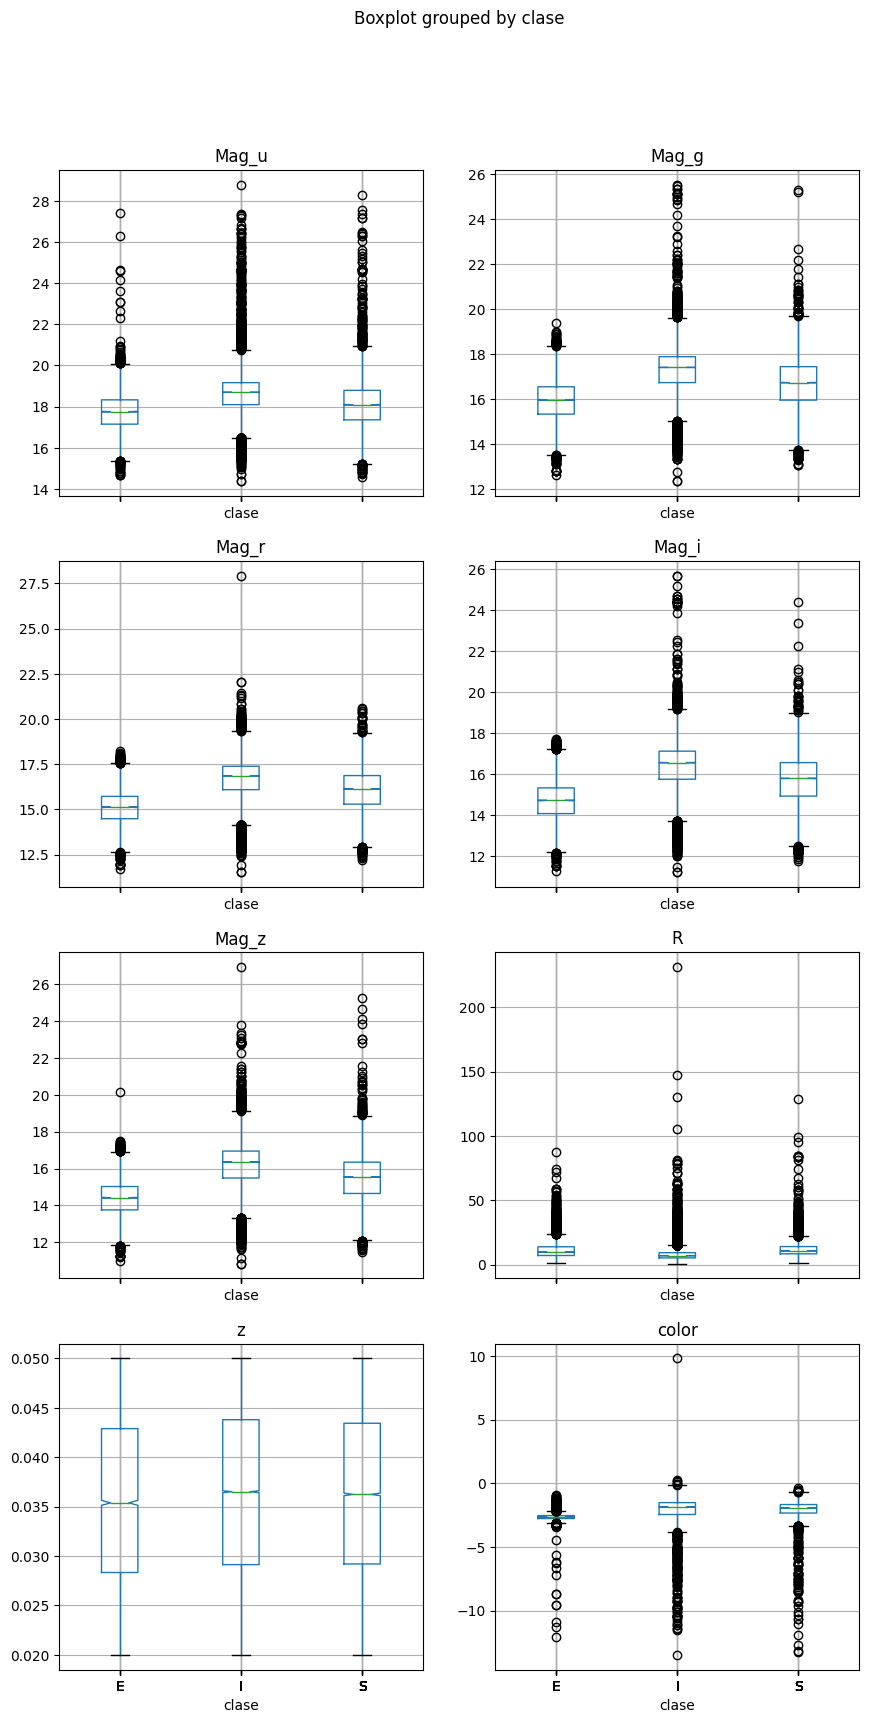

In [13]:
fig, ax = plt.subplots(4, 2,sharex=True, figsize=(10, 20))
data2.boxplot('Mag_u','clase',notch=True, ax=ax[0][0])
data2.boxplot('Mag_g','clase',notch=True, ax=ax[0][1])
data2.boxplot('Mag_r','clase',notch=True, ax=ax[1][0])
data2.boxplot('Mag_i','clase',notch=True, ax=ax[1][1])
data2.boxplot('Mag_z','clase', notch=True,ax=ax[2][0])
data2.boxplot('R','clase',notch=True, ax=ax[2][1])
data2.boxplot('z','clase',notch=True, ax=ax[3][0])
data2.boxplot('color','clase',notch=True, ax=ax[3][1])
#plt.savefig('sinfalsos.png')

### Ahora limpio tambien los outliers.

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92100 entries, 0 to 92101
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         92100 non-null  float64
 1   dec        92100 non-null  float64
 2   Mag_u      92100 non-null  float64
 3   Mag_g      92100 non-null  float64
 4   Mag_r      92100 non-null  float64
 5   Mag_i      92100 non-null  float64
 6   Mag_z      92099 non-null  float64
 7   R          92100 non-null  float64
 8   z          92100 non-null  float64
 9   color      92100 non-null  float64
 10  eliptica   92100 non-null  int64  
 11  espiral    92100 non-null  int64  
 12  irregular  92100 non-null  int64  
 13  clase      92100 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 10.5+ MB


In [15]:
cols = ['Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z',
       'color']
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1

data_clean = data2[~((data2[cols] < (Q1 - 2.5 * IQR)) |(data2[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()

C:\Users\joaqu\AppData\Local\Temp\ipykernel_9004\4012397026.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data2.quantile(0.25)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_9004\4012397026.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data2.quantile(0.75)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_9004\4012397026.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data2[~((data2[cols] < (Q1 - 2.5 * IQR)) |(data2[cols] > (Q3 + 2.5 * IQR

In [16]:
data_clean.reset_index(drop=True)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0,S
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1,I
4,129.945145,55.628530,18.08747,16.73876,16.16752,15.83606,15.55770,8.978182,0.035336,-1.919950,0,1,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90245,231.454425,13.720767,18.29036,17.08870,16.64642,16.47640,16.23665,12.597290,0.031076,-1.643940,0,0,1,I
90246,229.952919,13.901910,18.50503,17.61519,17.42118,17.22631,17.02195,11.375120,0.024916,-1.083851,0,0,1,I
90247,230.409336,15.609567,19.10474,17.32522,16.52188,16.15482,15.81765,7.268999,0.047463,-2.582861,0,0,1,I
90248,234.344663,13.149347,18.96371,17.78346,17.30556,17.07973,16.86880,7.058972,0.027961,-1.658144,0,0,1,I


### y ploteo dos boxplot diferentes para los datos limpios

<Axes: title={'center': 'color'}, xlabel='clase'>

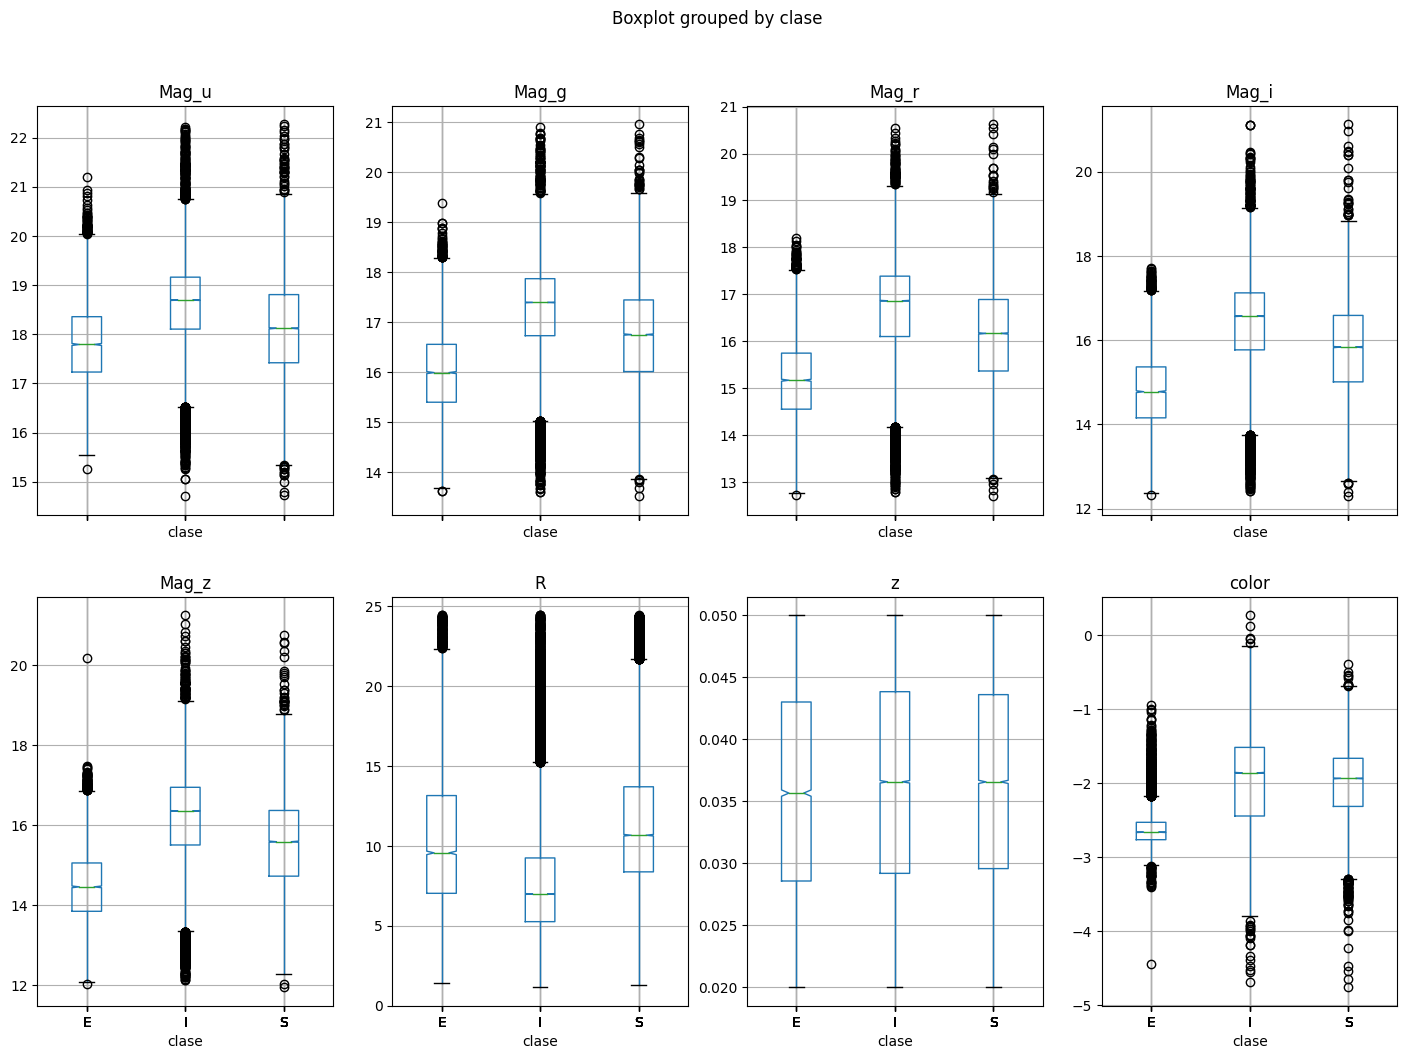

In [17]:
fig, ax = plt.subplots(2, 4,sharex=True, figsize=(17, 12))
data_clean.boxplot('Mag_u','clase',notch=True, ax=ax[0][0])
data_clean.boxplot('Mag_g','clase',notch=True, ax=ax[0][1])
data_clean.boxplot('Mag_r','clase',notch=True, ax=ax[0][2])
data_clean.boxplot('Mag_i','clase',notch=True, ax=ax[0][3])
data_clean.boxplot('Mag_z','clase',notch=True, ax=ax[1][0])
data_clean.boxplot('R','clase',notch=True, ax=ax[1][1])
data_clean.boxplot('z','clase',notch=True, ax=ax[1][2])
data_clean.boxplot('color','clase',notch=True, ax=ax[1][3])
#plt.savefig('clean_horizontal.png')

<Axes: xlabel='color', ylabel='clase'>

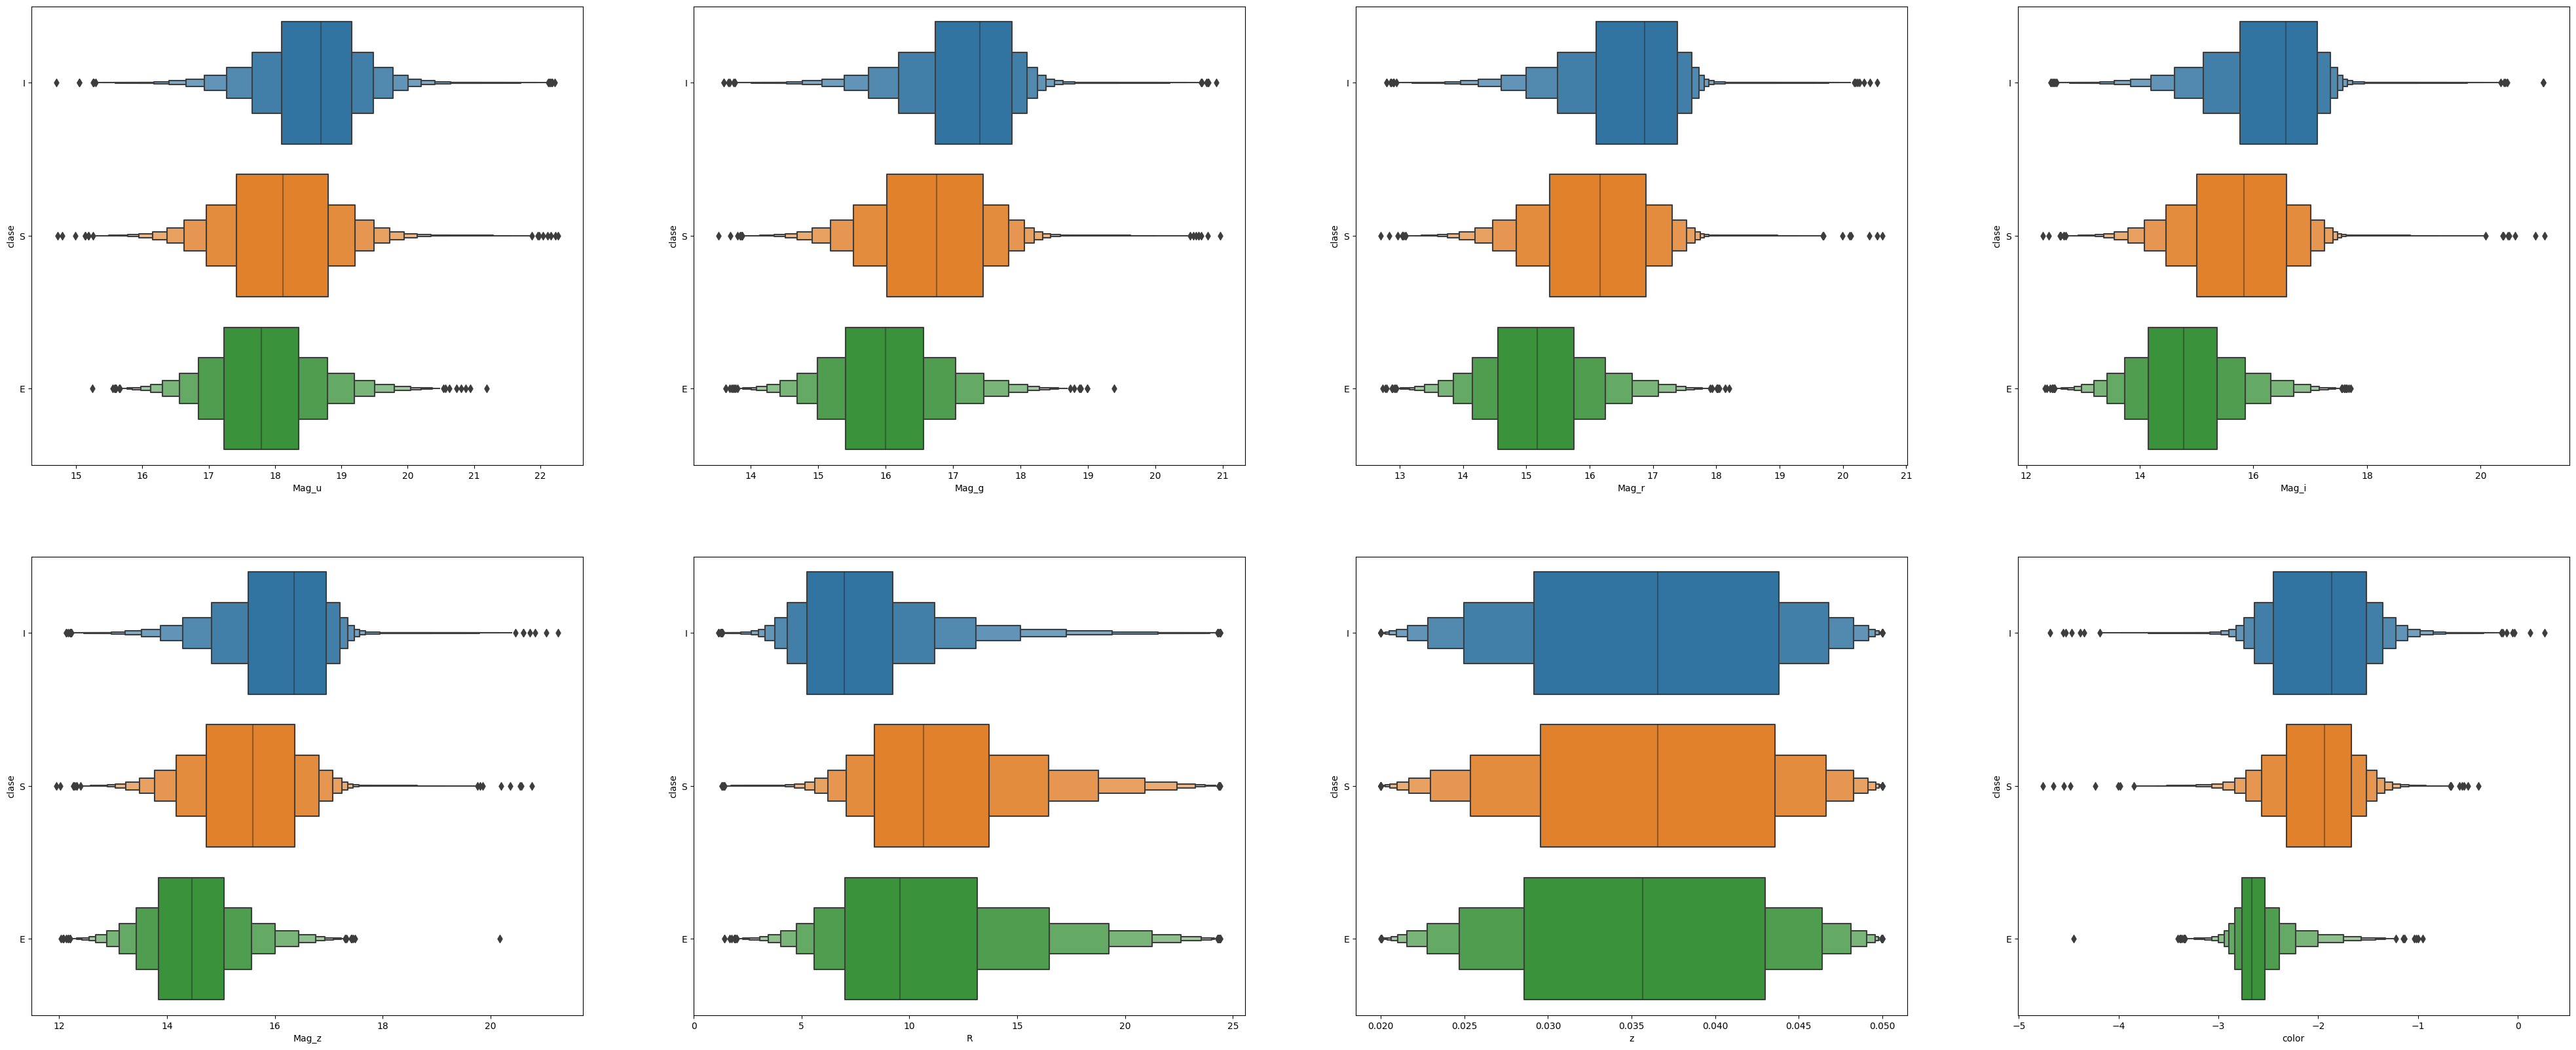

In [18]:
fig, ax = plt.subplots(2, 4,sharex=False, figsize=(50, 20))
sns.boxenplot(data=data_clean,x='Mag_u',y='clase', ax=ax[0][0])
sns.boxenplot(data=data_clean,x='Mag_g',y='clase', ax=ax[0][1])
sns.boxenplot(data=data_clean,x='Mag_r',y='clase', ax=ax[0][2])
sns.boxenplot(data=data_clean,x='Mag_i',y='clase', ax=ax[0][3])
sns.boxenplot(data=data_clean,x='Mag_z',y='clase', ax=ax[1][0])
sns.boxenplot(data=data_clean,x='R'    ,y='clase', ax=ax[1][1])
sns.boxenplot(data=data_clean,x='z'    ,y='clase', ax=ax[1][2])
sns.boxenplot(data=data_clean,x='color',y='clase', ax=ax[1][3])
#plt.savefig('boxplots_clean_horizontal.png')

### Ahora busco hacer Pairplot

In [19]:
data_clean.columns


Index(['ra', 'dec', 'Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z',
       'color', 'eliptica', 'espiral', 'irregular', 'clase'],
      dtype='object')

In [20]:
attributes = ['Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z','clase','color']

 ### Para hacer pairplot necesito crear un dataframe que contenga solamente las columnas a cruzar, de otra forma no sale nunca la imagen.

In [21]:
data_pairplot=data_clean[attributes].copy()

In [22]:
#pd.plotting.scatter_matrix(data_pairplot, figsize=(10,9),hue='clase') #esta es otra forma de hacerlo

In [23]:
#sns.pairplot(data_pairplot, hue="clase")                  #Comento todo porque tarda mucho en salir el grafico.
#plt.savefig('pairplottt.png')                             #me gusta mas esta forma

In [24]:
#boxplot = data.boxplot(column=attributes,by='clase',figsize=(10,10)) no sirve

### Ahora ploteo algunos histogramas para tener.

### Mag_u

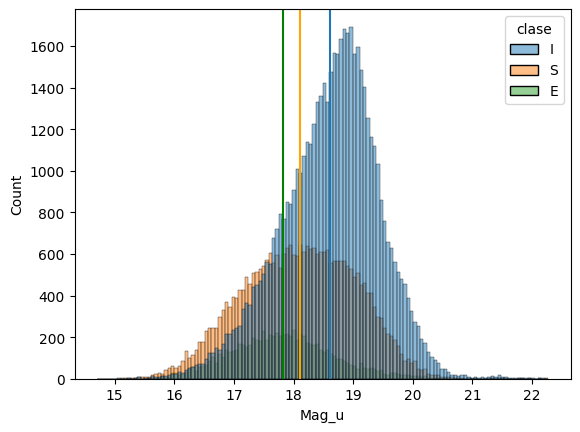

In [25]:

graph = sns.histplot(data=data_clean, x = 'Mag_u',hue='clase')
graph.axvline(data_clean['Mag_u'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['Mag_u'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['Mag_u'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

### Mag_g

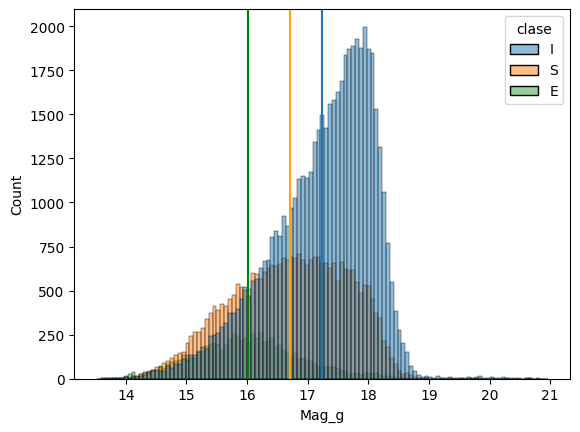

In [26]:
graph = sns.histplot(data=data_clean, x = 'Mag_g',hue='clase')
graph.axvline(data_clean['Mag_g'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['Mag_g'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['Mag_g'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

### Mag_r

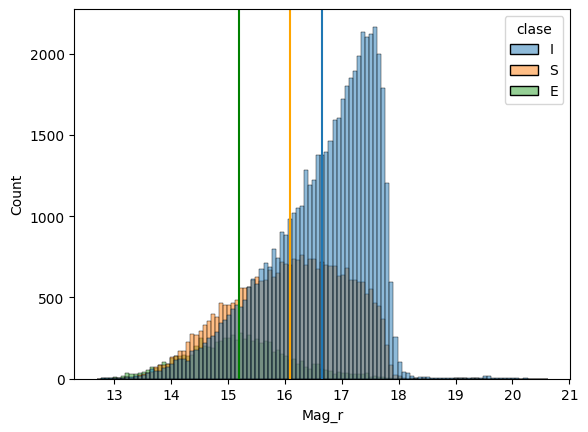

In [27]:
graph = sns.histplot(data=data_clean, x = 'Mag_r',hue='clase')
graph.axvline(data_clean['Mag_r'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['Mag_r'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['Mag_r'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

### Mag_i

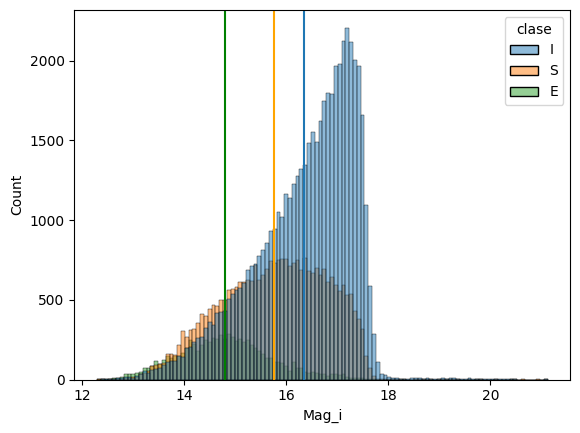

In [28]:
graph = sns.histplot(data=data_clean, x = 'Mag_i',hue = 'clase')
graph.axvline(data_clean['Mag_i'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['Mag_i'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['Mag_i'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

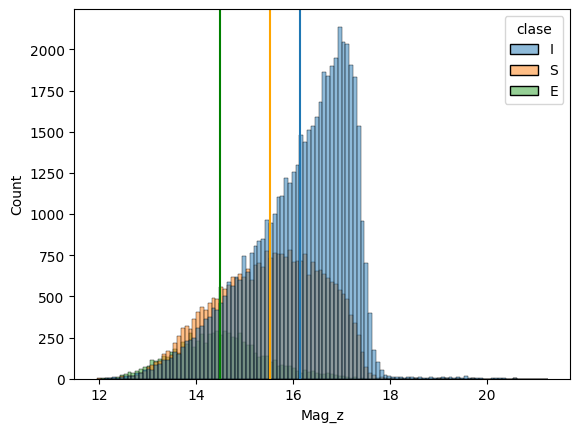

In [29]:
graph = sns.histplot(data=data_clean, x = 'Mag_z',hue='clase')
graph.axvline(data_clean['Mag_z'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['Mag_z'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['Mag_z'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

### z

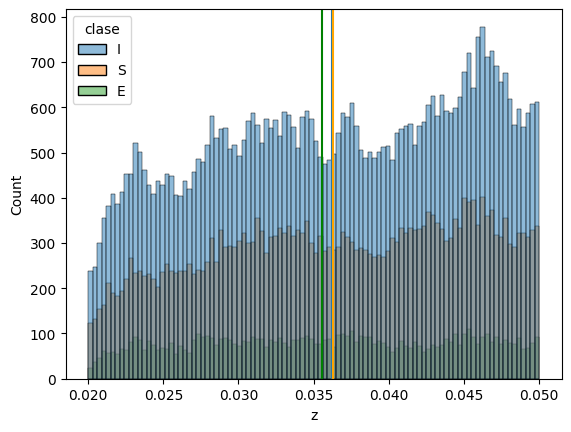

In [30]:
graph = sns.histplot(data=data_clean, x = 'z',hue='clase',bins=100)
graph.axvline(data_clean['z'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['z'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['z'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

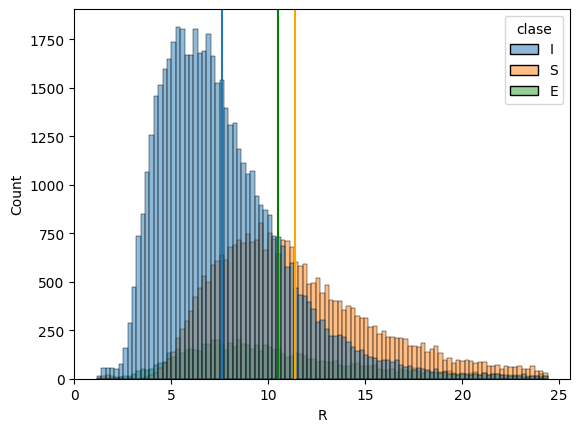

In [31]:
graph = sns.histplot(data=data_clean, x = 'R',hue='clase')
graph.axvline(data_clean['R'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['R'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['R'][data_clean['clase']=='E'].mean(),color='green')
plt.show()

### R

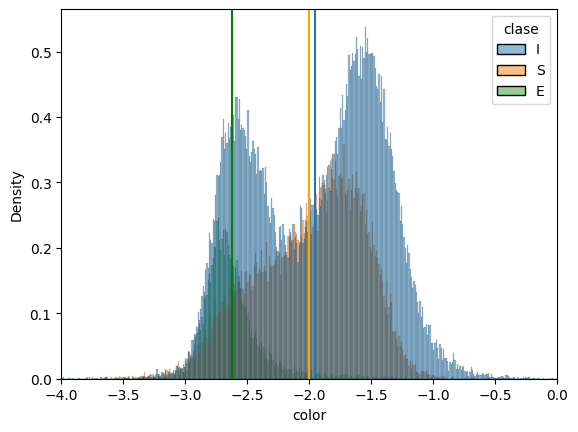

In [32]:
graph = sns.histplot(data=data_clean, x = 'color',hue='clase', bins=500, stat='density')
graph.axvline(data_clean['color'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['color'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['color'][data_clean['clase']=='E'].mean(),color='green')
plt.xlim(-4, 0)
#plt.savefig('color.png')
plt.show()

### Esto es para hacer diagramas de dispersion.

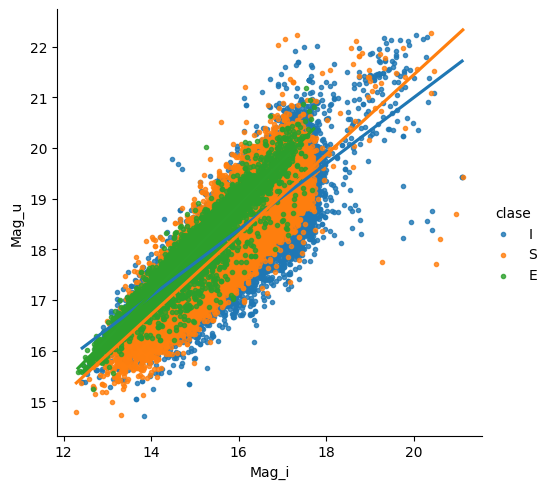

In [47]:
sns.lmplot(x='Mag_i', y='Mag_u', data=data_clean, hue='clase',markers='.',aspect=1,palette=None)
#plt.savefig('save_asjgjh_a_png.png')

# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

Los valores de la tabla de abajo son valores ya limpios. Se puede ver que son muy parecidos entre si, y esto nos sugiere hacer un analisis mas profundo sobre la utilidad de la variable `'z'`

In [34]:
data_clean.groupby(['clase'])['z'].describe()

,count,mean,std,min,25%,50%,75%,max
clase,,,,,,,,
E,7883.0,0.035586,0.008357,0.020001,0.028561,0.035652,0.043001,0.049999
I,53249.0,0.036229,0.008466,0.020002,0.029178,0.036563,0.043832,0.050000
S,29118.0,0.036307,0.008306,0.020001,0.029561,0.036556,0.043595,0.049999


# Distribución Normal

- Grafique la distribución Normal variando sus estadísticos. Realice una breve descripción de los cambios que nota en estos.

Algunos valores físicos de las galaxias no pueden ser determinados. Muchas veces la alternativa al usual *NaN* es llenar la celda del valor faltante con cero o con números de valor muy grande o muy chico discordantes a los valores usuales que toma la cantidad física. 

Se puede optar por ignorar dicho número o remplazarlo por cero, el valor medio o eliminarlo en el caso que el dataset sea de una gran dimensión.

El caso anteriormente se observa con la variable *color* donde dos de las galaxias no tienen su color determinado. 

- Dele solución 
- Ajuste la distribución de la variable **color** con el tamaño del bin=0.1 a una Normal usando *sns.distplot* 
- Explique que observa

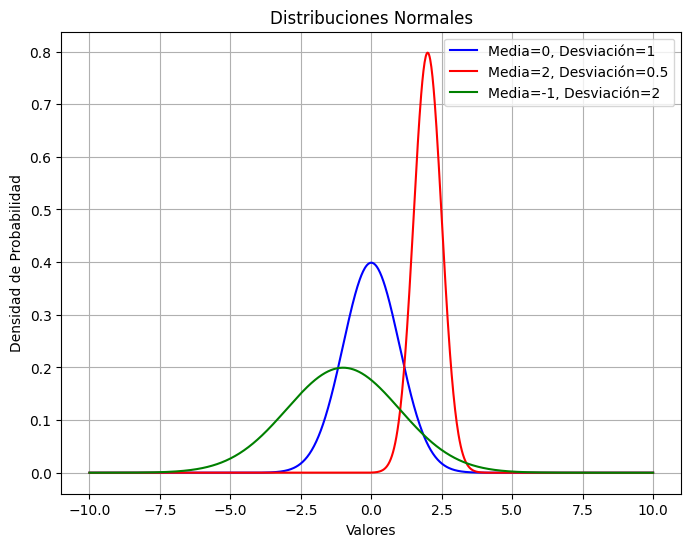

In [35]:
# Parámetros de las distribuciones normales
medias = [0, 2, -1]  # Medias
desviaciones = [1, 0.5, 2]  # Desviaciones estándar
colores = ['blue', 'red', 'green']  # Colores de las curvas

# Generar valores para las distribuciones normales
x = np.linspace(-10, 10, 1000)  # Rango de valores de x

# Graficar las distribuciones normales
plt.figure(figsize=(8, 6))  # Tamaño de la figura

for media, desviacion, color in zip(medias, desviaciones, colores):
    y = (1 / (desviacion * np.sqrt(2 * np.pi))) * np.exp(-((x - media)**2) / (2 * desviacion**2))  # Función de densidad de probabilidad
    plt.plot(x, y, color=color, label=f'Media={media}, Desviación={desviacion}')

plt.title('Distribuciones Normales')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.legend()
plt.show()

En este código, se definen tres distribuciones normales con diferentes parámetros estadísticos: medias (medias) de 0, 2 y -1, y desviaciones estándar (desviaciones) de 1, 0.5 y 2. También se especifican los colores correspondientes para cada curva (colores).

Luego, se itera sobre las listas medias, desviaciones y colores utilizando la función zip() para combinar los elementos correspondientes en cada iteración. Se generan los valores de las distribuciones normales y se grafican en la misma figura utilizando el bucle for. La etiqueta de cada curva se crea utilizando f-strings para mostrar los valores de la media y la desviación estándar.

Distribución Normal con media 0 y desviación estándar 1 (color azul):

Media: La curva se centra en x=0. Al aumentar o disminuir la media, la curva se desplazará hacia la derecha o hacia la izquierda, respectivamente.
Desviación estándar: La curva tiene una dispersión moderada alrededor de la media. Al aumentar la desviación estándar, la curva se vuelve más ancha, lo que indica que los datos se dispersan más. Al disminuir la desviación estándar, la curva se vuelve más estrecha y puntiaguda, lo que significa que los datos se concentran más cerca de la media.

Distribución Normal con media 2 y desviación estándar 0.5 (color rojo):

Media: La curva se desplaza hacia la derecha, centrándose en x=2. Al aumentar o disminuir la media, la curva se desplazará en la dirección correspondiente.
Desviación estándar: La curva tiene una dispersión más estrecha alrededor de la media. Al aumentar la desviación estándar, la curva se vuelve más ancha, lo que indica una mayor dispersión de los datos. Al disminuir la desviación estándar, la curva se vuelve más estrecha y puntiaguda, lo que significa que los datos se concentran más cerca de la media.

Distribución Normal con media -1 y desviación estándar 2 (color verde):

Media: La curva se desplaza hacia la izquierda, centrándose en x=-1. Al aumentar o disminuir la media, la curva se desplazará en la dirección correspondiente.
Desviación estándar: La curva tiene una dispersión más amplia alrededor de la media. Al aumentar la desviación estándar, la curva se vuelve más ancha, lo que indica una mayor dispersión de los datos. Al disminuir la desviación estándar, la curva se vuelve más estrecha y puntiaguda, lo que significa que los datos se concentran más cerca de la media.
En resumen, al modificar la media, desplazamos la curva horizontalmente, mientras que al modificar la desviación estándar, controlamos la dispersión o concentración de los datos alrededor de la media. Estos cambios afectan la forma y la distribución de las curvas de las distribuciones normales.

### Aca hacemos el analisis de la variable color

Primero grafico sin distinguir las clases

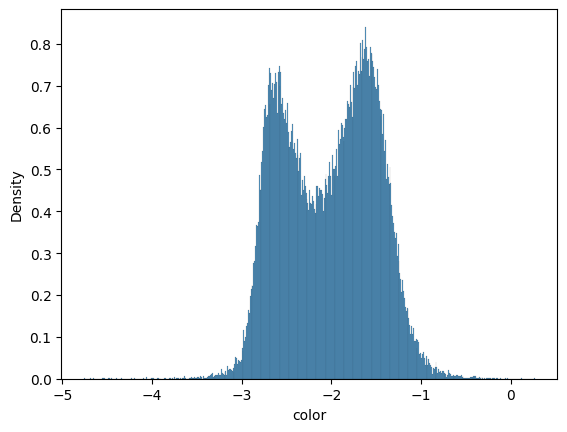

In [36]:
graph = sns.histplot(data=data_clean, x = 'color', bins=500, stat='density')
plt.show()

Esta es una manera interesante de graficar curvas, se utiliza un kernel para estimar la densidad.

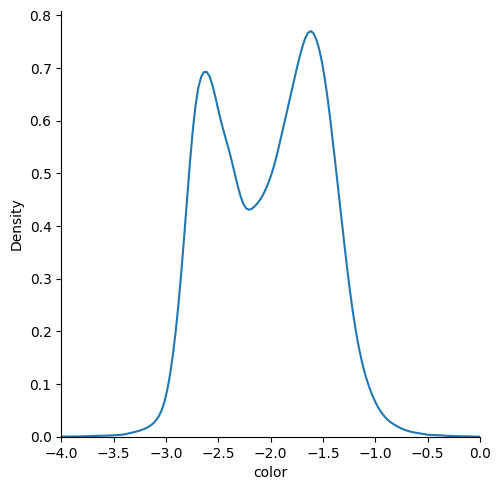

In [37]:
sns.displot(data=data_clean, x='color', kind="kde")
plt.xlim(-4, 0)
plt.show()

Esta es la manera definitiva de hacerlo y la que pusimos en el informe.

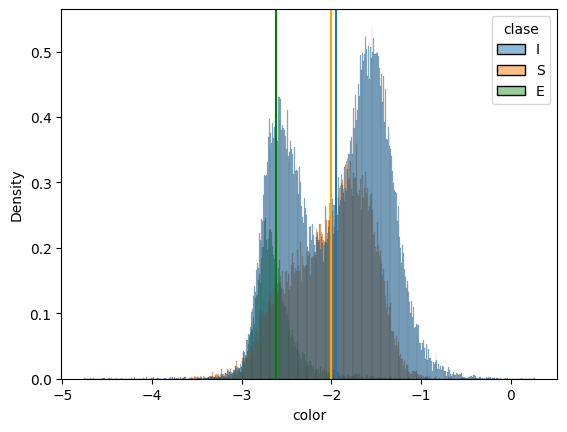

In [38]:
graph = sns.histplot(data=data_clean, x = 'color',hue='clase', bins=500, stat='density')
graph.axvline(data_clean['color'][data_clean['clase']=='I'].mean())
graph.axvline(data_clean['color'][data_clean['clase']=='S'].mean(),color='orange')
graph.axvline(data_clean['color'][data_clean['clase']=='E'].mean(),color='green')

#plt.savefig('color.png')
plt.show()

esto es lo mismo pero con el kernel de densidad

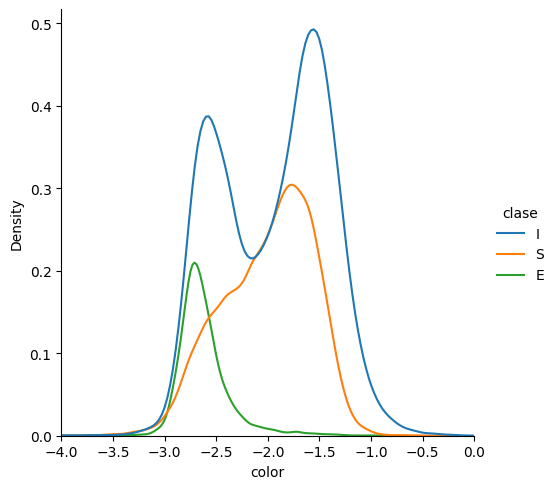

In [39]:
sns.displot(data=data_clean, x='color', kind="kde",hue='clase')
plt.xlim(-4, 0)
plt.show()

# Probabilidad

- Calcule la Probabilidad marginal de cada tipo morfologico y grafiquela.

- Calcule la probabilida conjunta las galaxias de clase = E con el color  mayor a -2.1

- Analice la correlación entre dos de las variables a través de chi-cuadrado. Muestre esta correlación a través de mapas de calor.

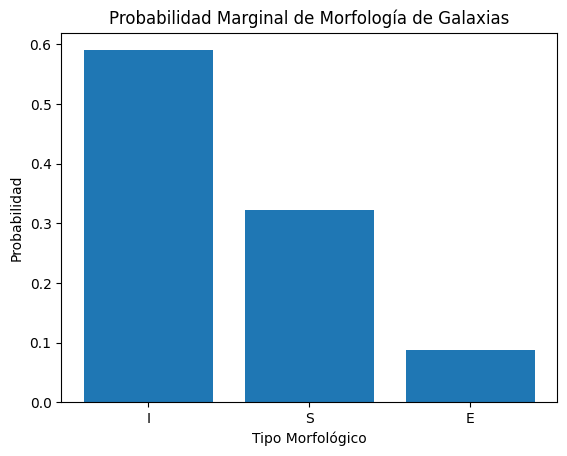

In [40]:
# Calcular la probabilidad marginal de cada tipo morfológico
morfologia_counts = data_clean['clase'].value_counts()
probabilidad_marginal = morfologia_counts / len(data_clean)

# Graficar la probabilidad marginal
plt.bar(probabilidad_marginal.index, probabilidad_marginal.values)
plt.title('Probabilidad Marginal de Morfología de Galaxias')
plt.xlabel('Tipo Morfológico')
plt.ylabel('Probabilidad')
plt.savefig('marginal_probability')
plt.show()

In [41]:
probabilidad_marginal.values

array([0.59001662, 0.32263712, 0.08734626])

In [42]:
# Filtrar las galaxias de clase 'E' con color mayor a -2.1
galaxias_E_color = data_clean[(data_clean['clase'] == 'E') & (data_clean['color'] > -2.1)]

# Calcular la probabilidad conjunta
probabilidad_conjunta = len(galaxias_E_color) / len(data_clean)

print("Probabilidad Conjunta: ", probabilidad_conjunta)

Probabilidad Conjunta:  0.003700831024930748


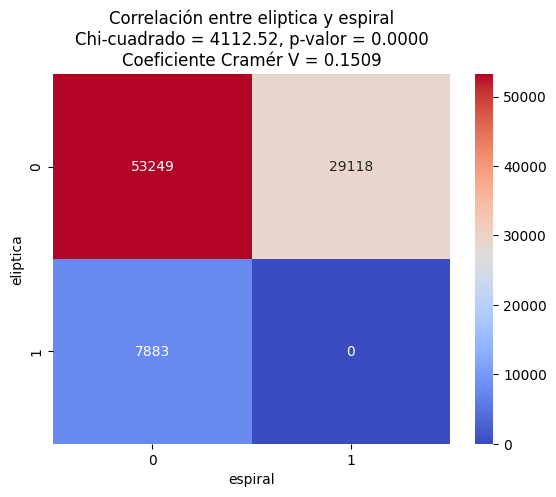

In [43]:
from scipy import stats
# Seleccionar las dos variables a analizar
variable1 = 'eliptica'
variable2 = 'espiral'

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(data_clean[variable1], data_clean[variable2])

# Calcular el estadístico chi-cuadrado y p-valor
chi2, p_value, _, _ = stats.chi2_contingency(tabla_contingencia)

# Calcular el coeficiente Cramér V
n = len(data_clean)
phi_c = np.sqrt(chi2 / (n * min(tabla_contingencia.shape) - 1))

# Crear el mapa de calor
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Correlación entre {variable1} y {variable2}\nChi-cuadrado = {chi2:.2f}, p-valor = {p_value:.4f}\nCoeficiente Cramér V = {phi_c:.4f}')
plt.xlabel(variable2)
plt.ylabel(variable1)
plt.savefig('color_map')
plt.show()

# Conclusiones: